In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Loading the dataset

In [2]:
df = pd.read_csv('data\CVD_cleaned.csv')

In [3]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [4]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [5]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [6]:
df = df.drop(['Sex'],axis = 1)

In [7]:
df = df.drop(['FriedPotato_Consumption'],axis = 1)

In [8]:
numerics =['int16','int32','int64','float16','float32','float64']
numcol = df.select_dtypes(include=numerics)
len(numcol)
numcol

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
0,150.0,32.66,14.54,0.0,30.0,16.0
1,165.0,77.11,28.29,0.0,30.0,0.0
2,163.0,88.45,33.47,4.0,12.0,3.0
3,180.0,93.44,28.73,0.0,30.0,30.0
4,191.0,88.45,24.37,0.0,8.0,4.0
...,...,...,...,...,...,...
308849,168.0,81.65,29.05,4.0,30.0,8.0
308850,180.0,69.85,21.48,8.0,15.0,60.0
308851,157.0,61.23,24.69,4.0,40.0,8.0
308852,183.0,79.38,23.73,3.0,30.0,12.0


In [9]:
char_col = df.select_dtypes(include=object)
char_col

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Smoking_History
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,70-74,Yes
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,70-74,No
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,60-64,No
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,75-79,No
4,Good,Within the past year,No,No,No,No,No,No,No,80+,Yes
...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,25-29,No
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,65-69,No
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,30-34,Yes
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,65-69,No


In [10]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
dtype: int64

<Axes: >

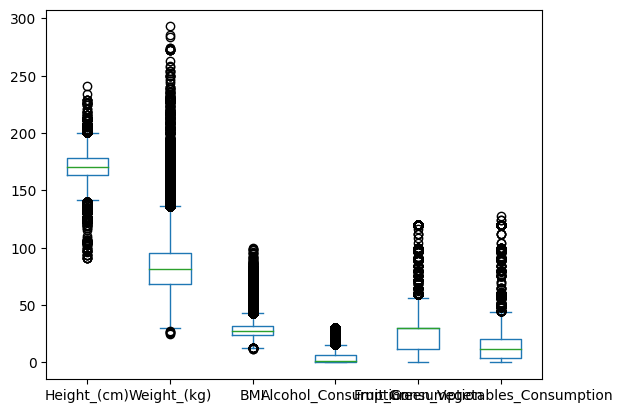

In [11]:
df.plot(kind='box')

In [12]:
tar_var = df['Heart_Disease']

## data visualisation

In [13]:
def get_conti_variables(dataset):
    numeric_columns = dataset.select_dtypes(include=['int64', 'float64'])

    # Convert the column names to a list
    continuous_variables = list(numeric_columns.columns)

    return continuous_variables

cont_list = get_conti_variables(df)


In [14]:
def get_catg_variables(dataset):
    cat_columns = dataset.select_dtypes(include=['object'])

    # Convert the column names to a list
    cat_variables = list(cat_columns.columns)

    return cat_variables

cat_list = get_catg_variables(df)

## Continuous

Boxplot

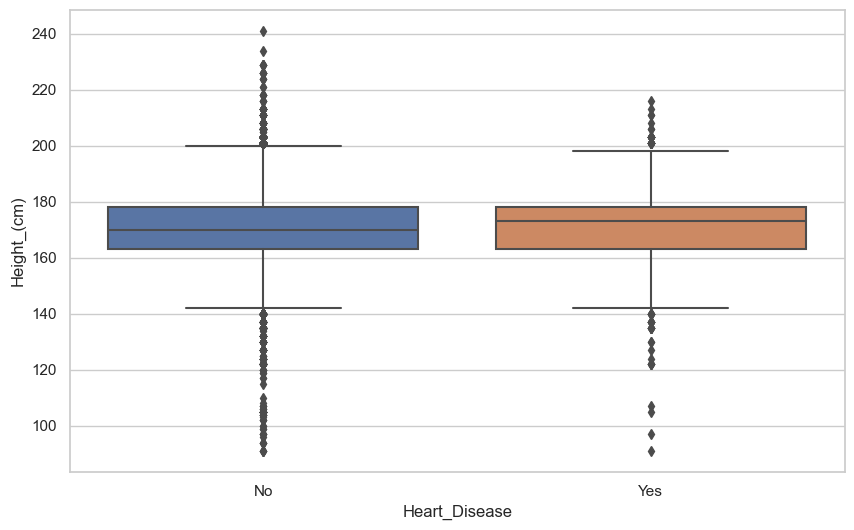

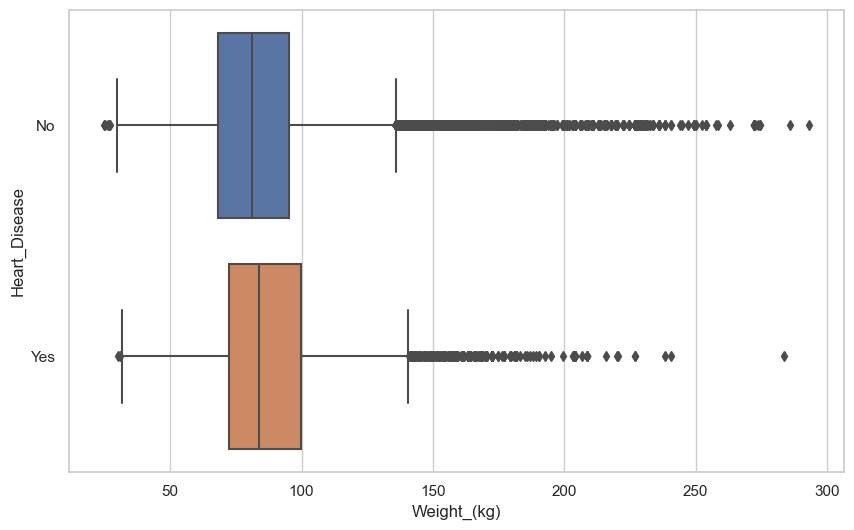

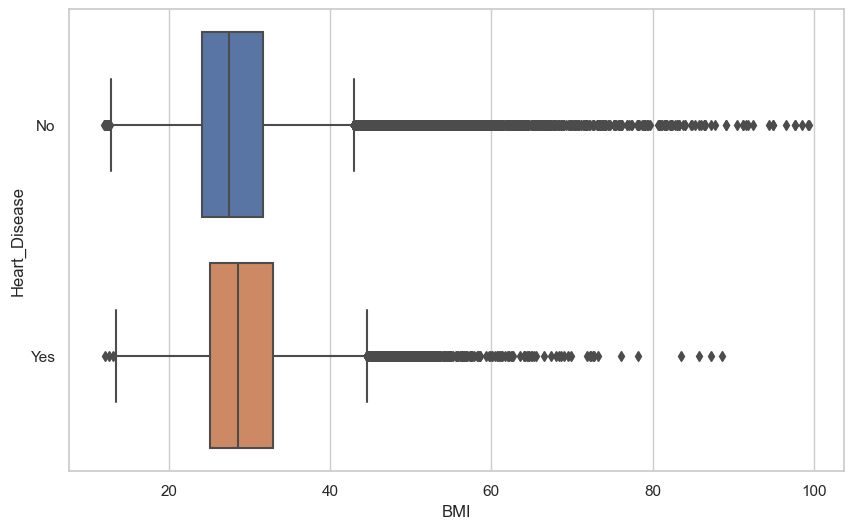

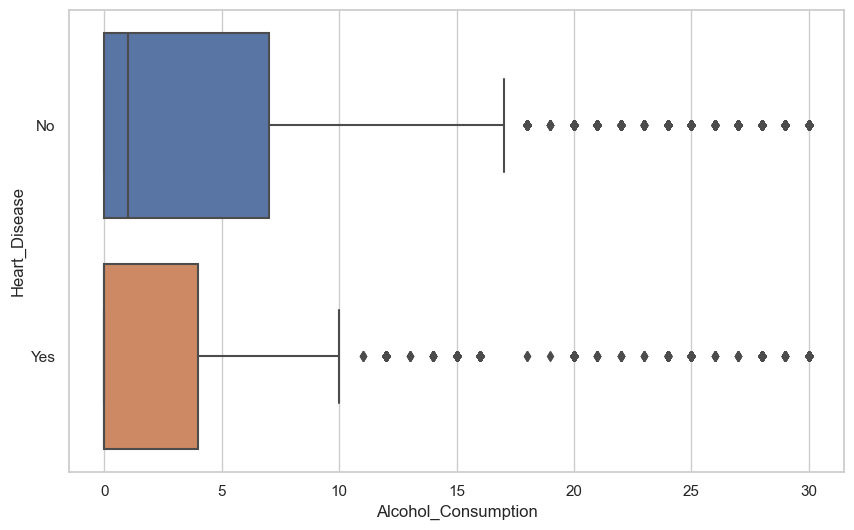

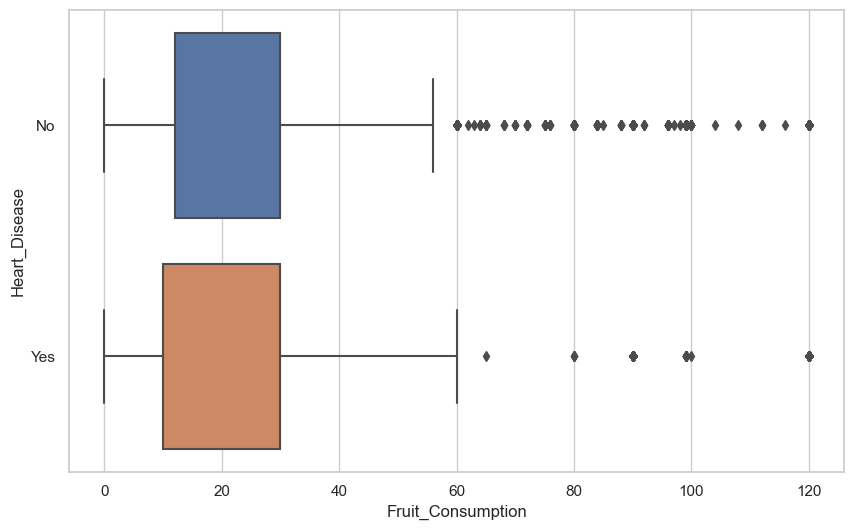

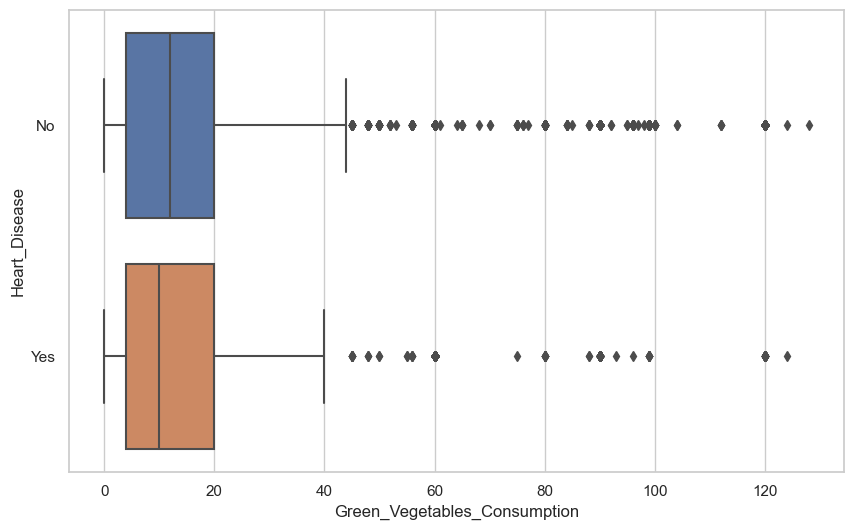

In [15]:
def boxplot_continuous_vs_target(data, continuous_vars, target_var):
    df_continuous = data[continuous_vars + [target_var]]
    sn.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sn.boxplot(data=df_continuous, x=target_var, y=df_continuous[continuous_vars[0]])

    
    for i in range(1, len(continuous_vars)):
        plt.figure(figsize=(10, 6))
        sn.boxplot(data=df_continuous,  x=df_continuous[continuous_vars[i]],y=target_var)

   
    plt.show()


boxplot_continuous_vs_target(df, cont_list, 'Heart_Disease')


Histogram

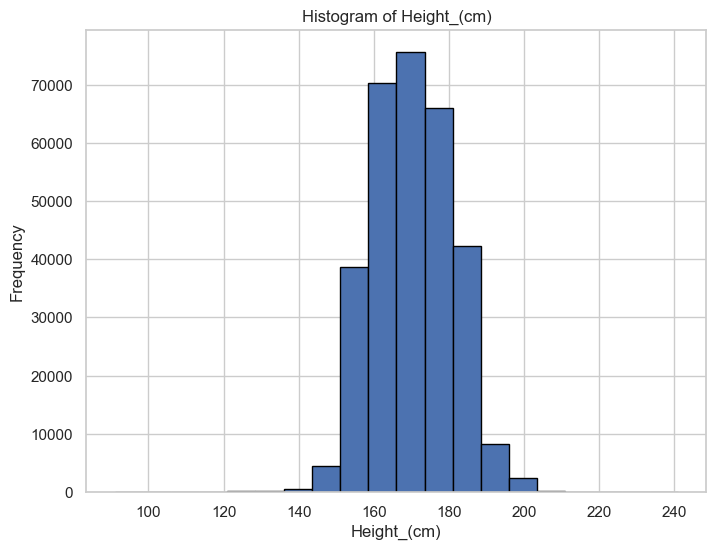

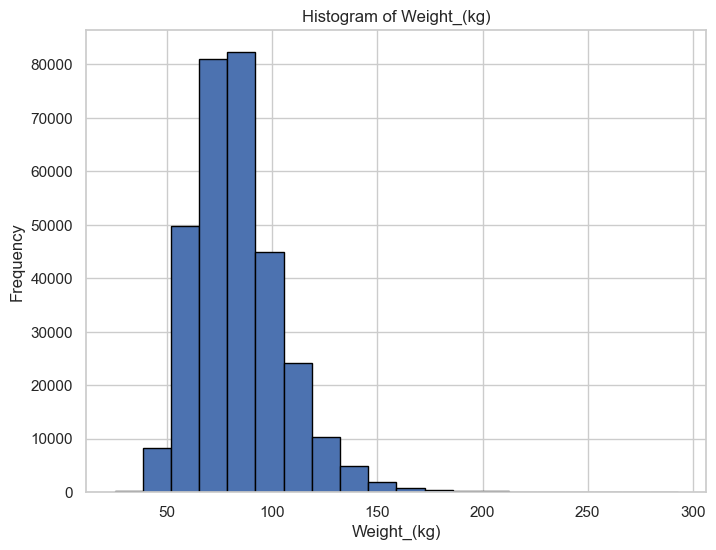

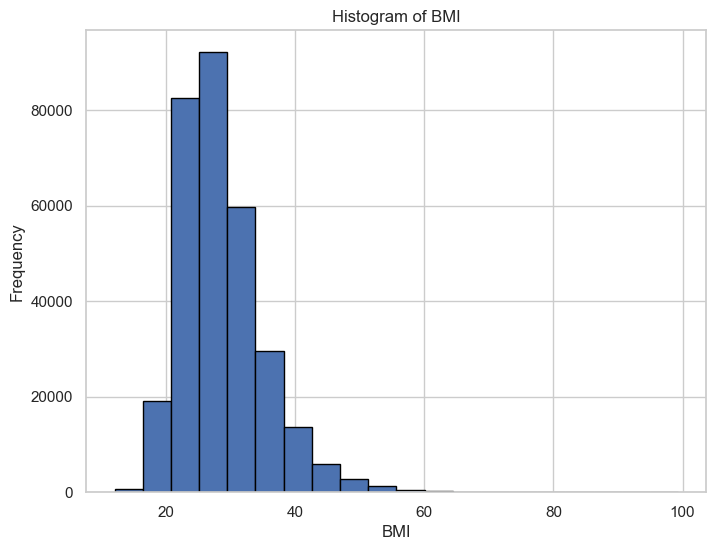

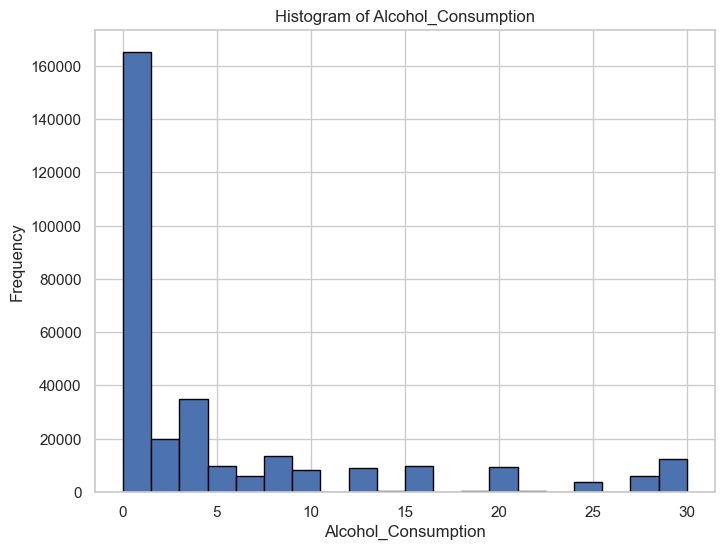

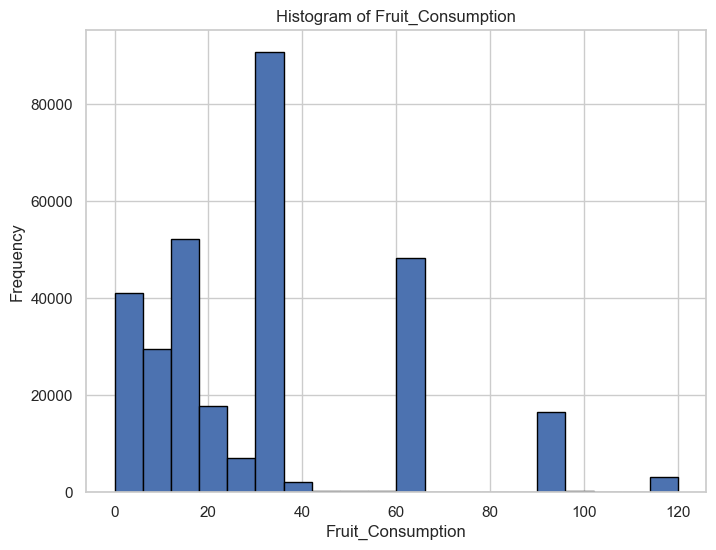

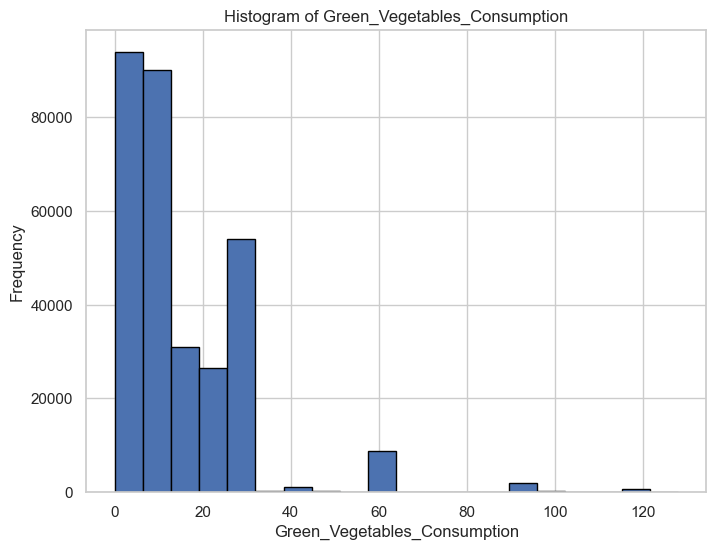

In [16]:
def plot_histograms(dataset, continuous_attributes):
    continuous_data = dataset[continuous_attributes]
    for column in continuous_attributes:
        plt.figure(figsize=(8, 6))
        plt.hist(continuous_data[column], bins=20, edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()

plot_histograms(df,cont_list)


## Categorical

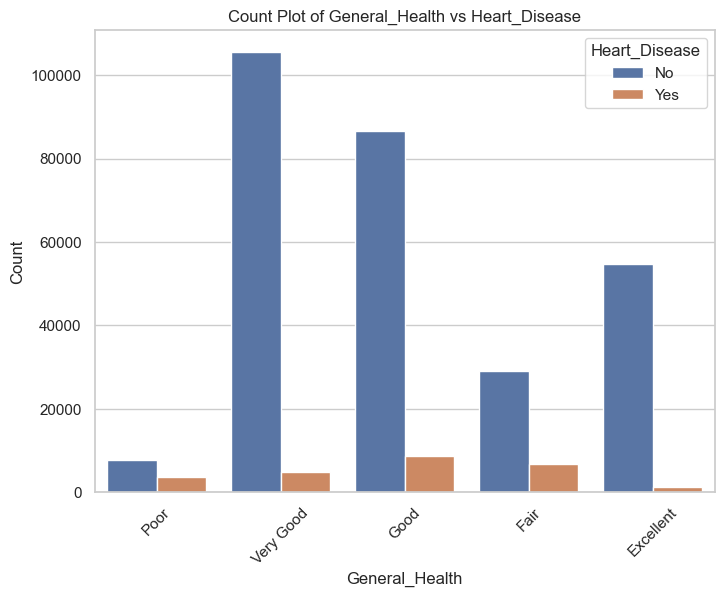

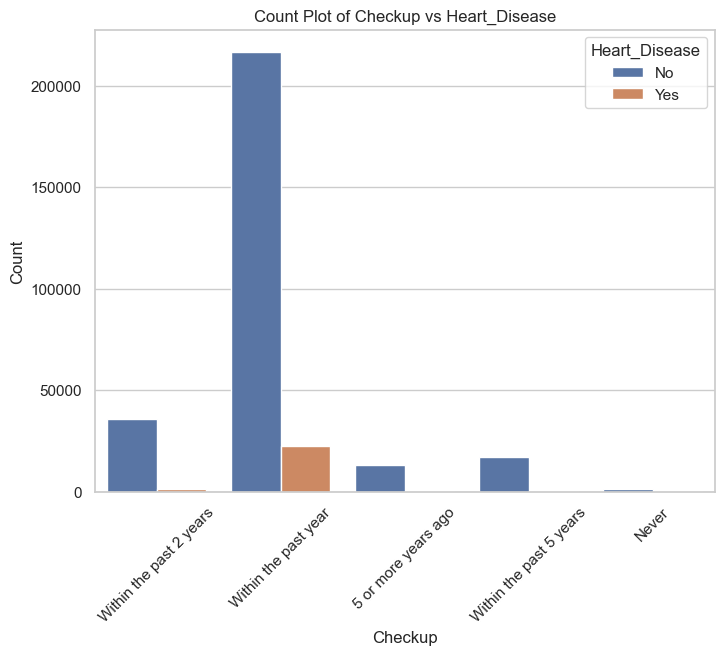

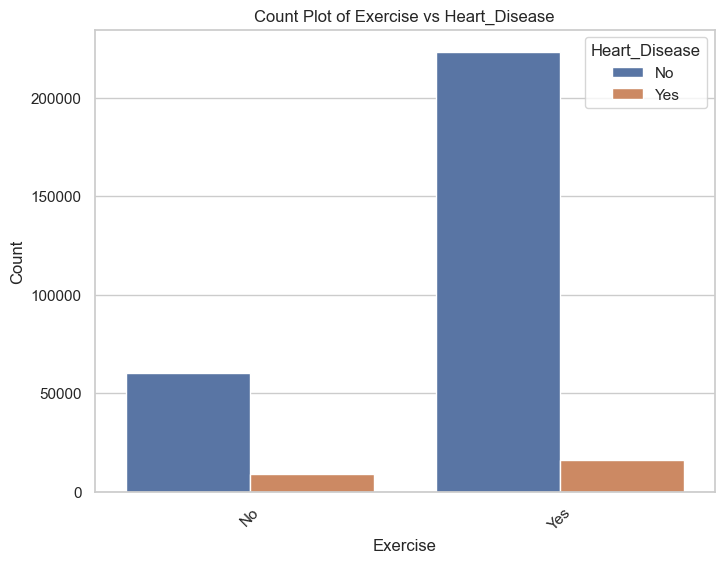

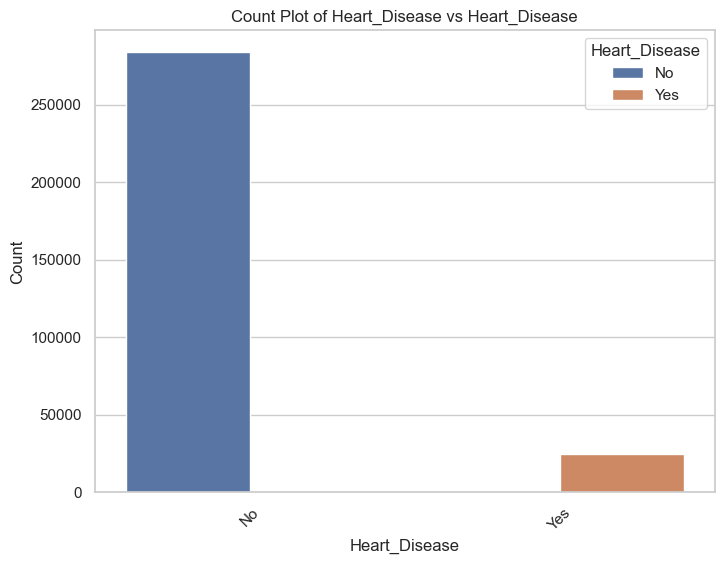

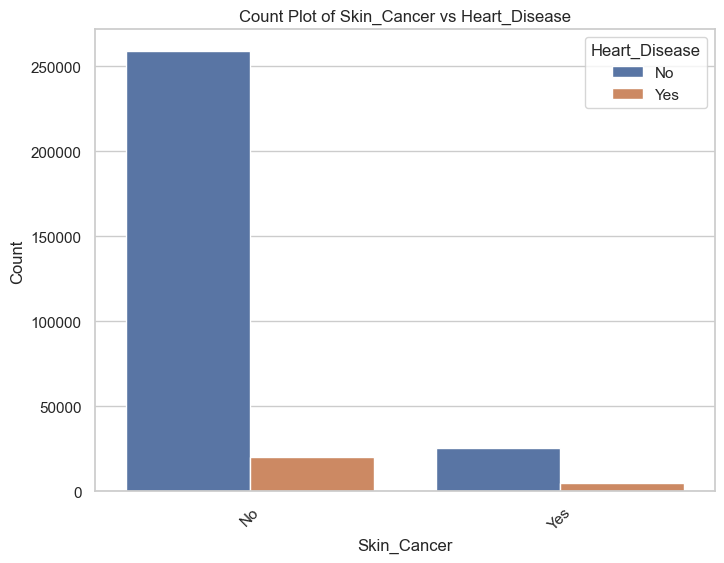

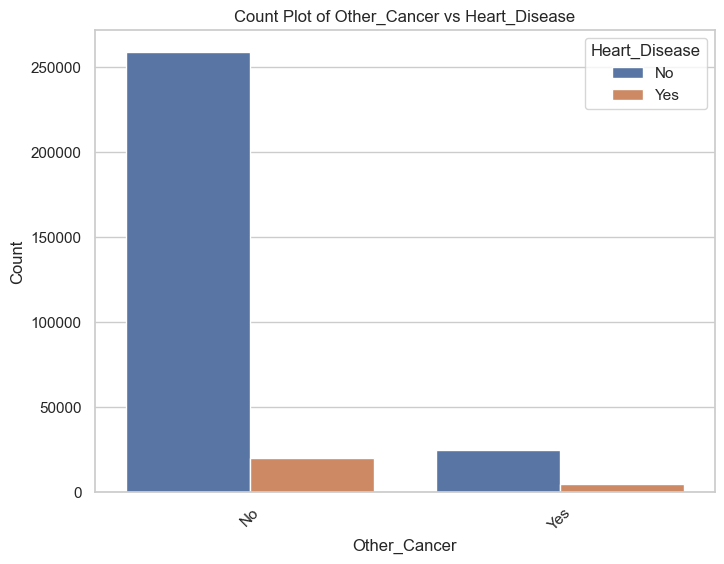

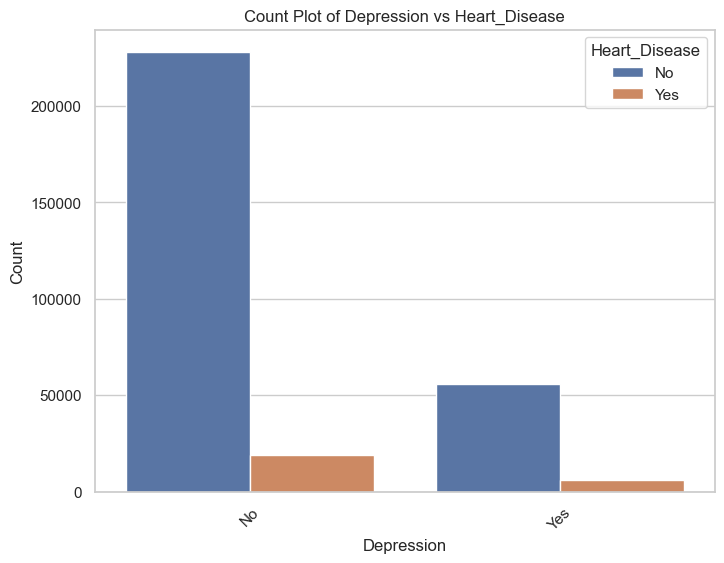

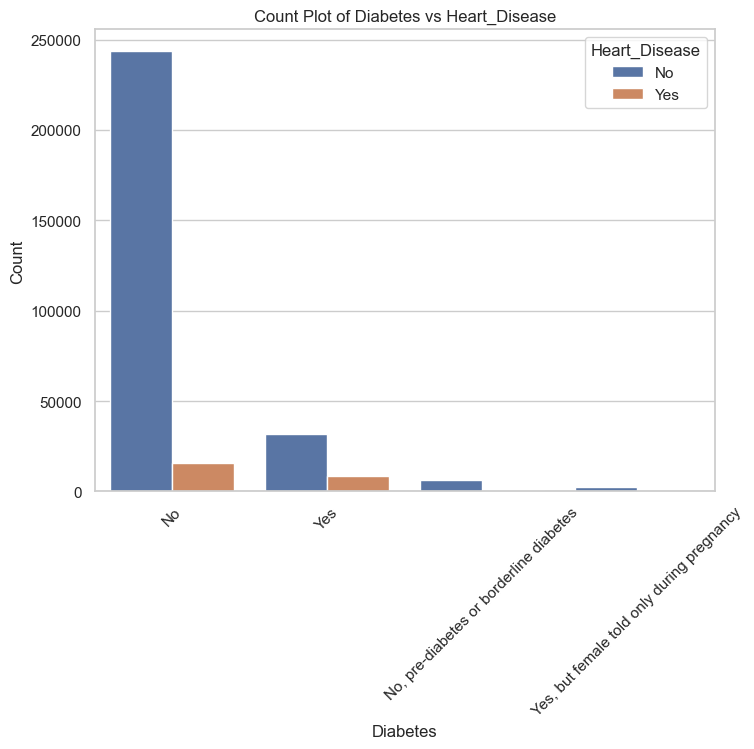

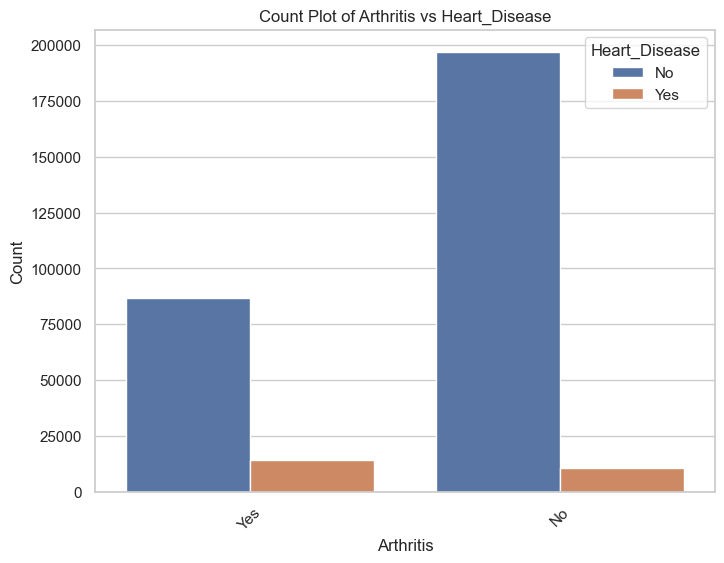

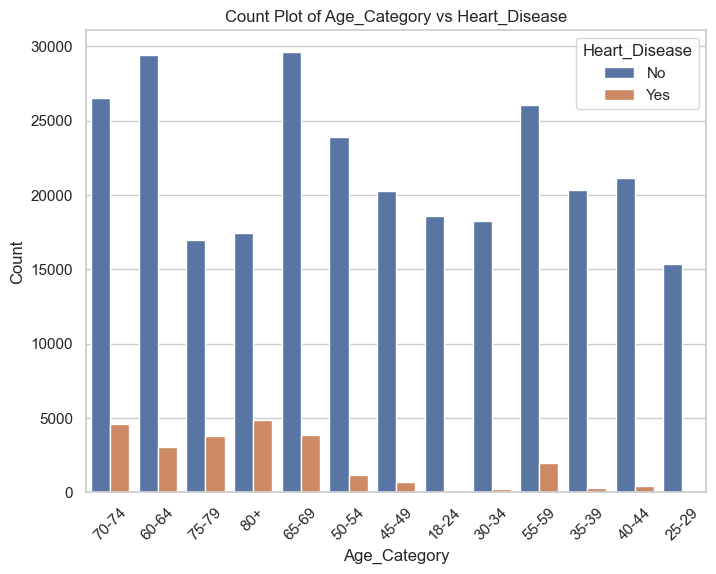

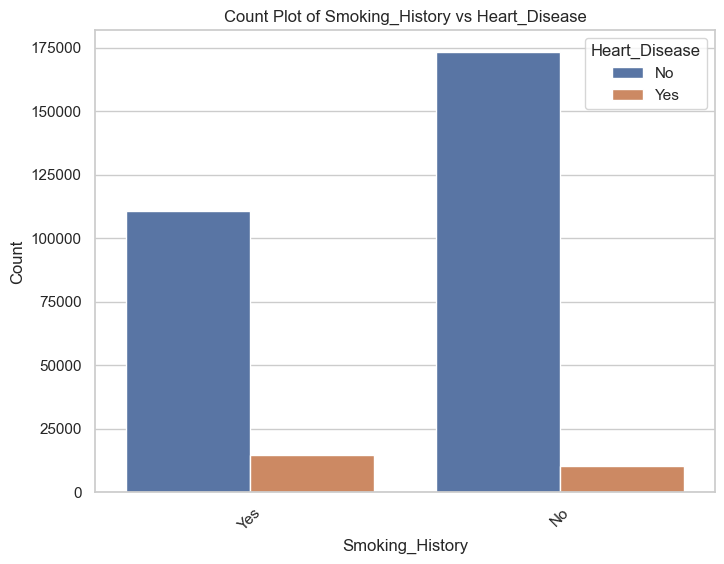

In [17]:
def plot_countplot_with_target(dataset, categorical_vars, target_var):
    
    for var in categorical_vars:
        plt.figure(figsize=(8, 6))
        sn.countplot(data=dataset, x=var, hue=target_var)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title(f'Count Plot of {var} vs {target_var}')
        plt.xticks(rotation=45)
        plt.legend(title=target_var)
        plt.show()


plot_countplot_with_target(df, cat_list, 'Heart_Disease')


removing unnecessary columns

## converting categorical to numerical

In [18]:
def label_encode_dataset(dataset, ordinal_vars):
    label_encoder = LabelEncoder()

    for col in ordinal_vars:
        dataset[col] = label_encoder.fit_transform(dataset[col])

    return dataset

encoded_data = label_encode_dataset(df, cat_list)
print(encoded_data)


        General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0                    3        2         0              0            0   
1                    4        4         0              1            0   
2                    4        4         1              0            0   
3                    3        4         1              1            0   
4                    2        4         0              0            0   
...                ...      ...       ...            ...          ...   
308849               4        4         1              0            0   
308850               1        3         1              0            0   
308851               4        0         1              0            0   
308852               4        4         1              0            0   
308853               0        4         1              0            0   

        Other_Cancer  Depression  Diabetes  Arthritis  Age_Category  \
0                  0           0         0          

## Correlation Matrix

In [19]:
correlation_matrix = encoded_data.corr()
correlation_matrix

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
General_Health,1.000000,0.027445,0.036887,-0.020645,0.020874,0.004457,0.002294,-0.025172,0.014010,0.032383,0.001602,0.014858,0.013979,0.004299,0.023656,-0.010947,-0.021550
Checkup,0.027445,1.000000,-0.029750,0.083480,0.079285,0.086747,0.035632,0.127812,0.150166,0.223067,-0.088958,0.012007,0.060868,-0.010145,-0.046676,0.039310,0.034934
Exercise,0.036887,-0.029750,1.000000,-0.096347,-0.003986,-0.054388,-0.084729,-0.136618,-0.124813,-0.122345,0.091618,-0.090144,-0.155756,-0.093295,0.094959,0.136787,0.125002
Heart_Disease,-0.020645,0.083480,-0.096347,1.000000,0.090848,0.092387,0.032526,0.166241,0.153913,0.229011,0.015780,0.045875,0.042666,0.107797,-0.036569,-0.020055,-0.024043
Skin_Cancer,0.020874,0.079285,-0.003986,0.090848,1.000000,0.150824,-0.013014,0.032968,0.136178,0.272074,0.006812,-0.028954,-0.037619,0.032828,0.042764,0.024123,0.012871
Other_Cancer,0.004457,0.086747,-0.054388,0.092387,0.150824,1.000000,0.015892,0.063898,0.129362,0.234459,-0.043459,-0.021132,0.001047,0.053431,-0.008663,0.007974,-0.003237
Depression,0.002294,0.035632,-0.084729,0.032526,-0.013014,0.015892,1.000000,0.053155,0.121598,-0.103169,-0.091318,0.047936,0.109597,0.100275,-0.028135,-0.039943,-0.051170
Diabetes,-0.025172,0.127812,-0.136618,0.166241,0.032968,0.063898,0.053155,1.000000,0.133890,0.192792,-0.043098,0.158219,0.205326,0.053780,-0.114190,-0.019099,-0.027347
Arthritis,0.014010,0.150166,-0.124813,0.153913,0.136178,0.129362,0.121598,0.133890,1.000000,0.370997,-0.097789,0.074104,0.137964,0.123196,-0.024896,-0.002012,-0.018825
Age_Category,0.032383,0.223067,-0.122345,0.229011,0.272074,0.234459,-0.103169,0.192792,0.370997,1.000000,-0.120895,-0.062262,-0.007390,0.133172,0.012869,0.043641,0.036045


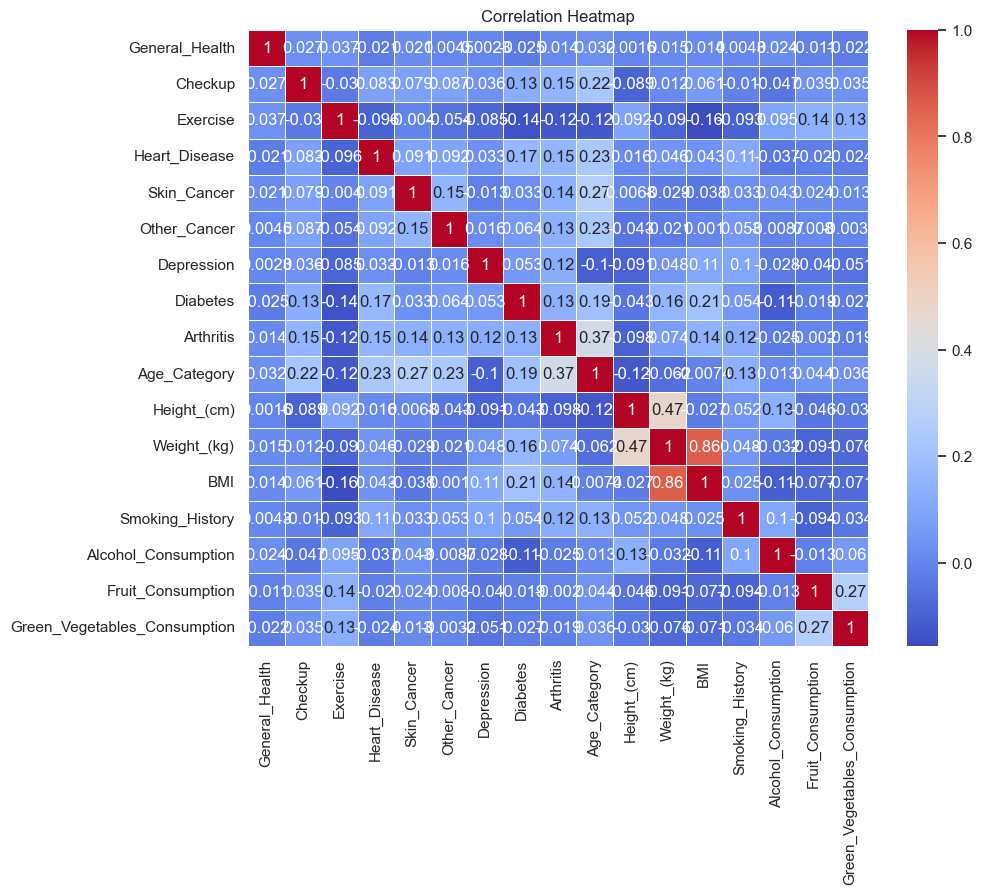

In [20]:
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
encoded_data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption'],
      dtype='object')

In [22]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption'],
      dtype='object')

## split data

In [23]:
columnindex = encoded_data.columns.get_loc('Heart_Disease')
print(columnindex)

3


In [24]:
X1 = encoded_data.iloc[:,0:3]
y = encoded_data.iloc[:,3].values
X2 = encoded_data.iloc[:,4:20]
X = pd.concat([X1,X2],axis=1)
X = X.values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model

## Supervised Learning


logistic regression without scaling 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9183008299426919


e:\source\repos\CelebalTechinternship-23\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic regression with Standard Scaling 

In [27]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the scaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaling parameters from training
X_test_scaled = scaler.transform(X_test)

# Now, you can use the scaled data to train your machine learning model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.918942545854851


save model as model.pk1

In [28]:
import pickle
with open('models/model.pkl', 'wb') as file:
    pickle.dump(model, file)


Random forest classification

In [29]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9182788039695002
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.44      0.04      0.07      4997

    accuracy                           0.92     61771
   macro avg       0.68      0.52      0.51     61771
weighted avg       0.88      0.92      0.89     61771

Confusion Matrix:
[[56537   237]
 [ 4811   186]]


Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8603713716792669
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     56774
           1       0.19      0.22      0.20      4997

    accuracy                           0.86     61771
   macro avg       0.56      0.57      0.56     61771
weighted avg       0.87      0.86      0.87     61771

Confusion Matrix:
[[52052  4722]
 [ 3903  1094]]


## Unsupervised learning


K means clustering

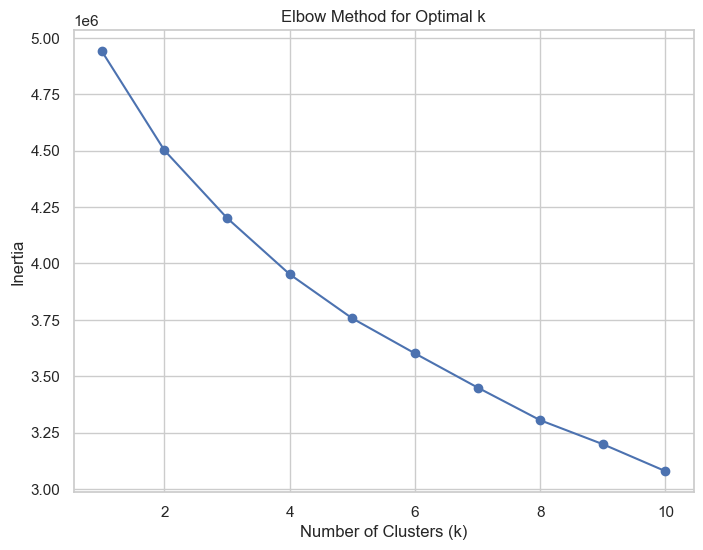

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Standardize the data (centering and scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (k) using the "Elbow Method"
# Here, we'll try different values of k and plot the inertia (within-cluster sum of squares)
# to identify the "elbow point" where the inertia starts to level off.
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=20)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Inertia Score: 3078772.4944492504


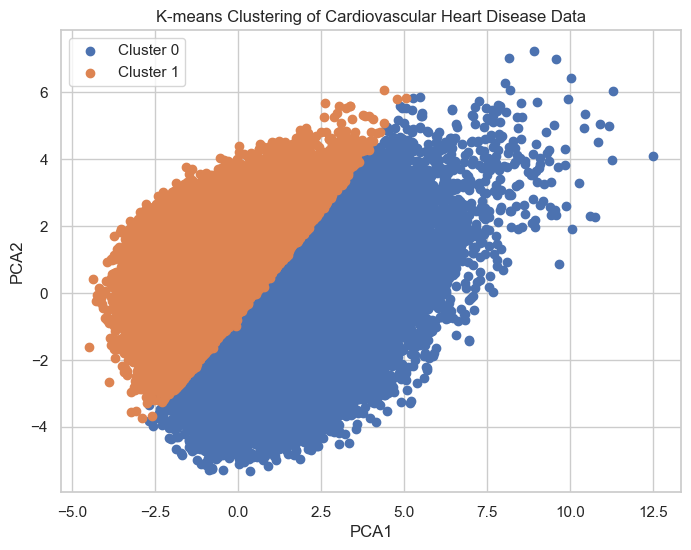

In [32]:
inertia_score = kmeans.inertia_

print("Inertia Score:", inertia_score)

# Based on the elbow point, select the optimal number of clusters (k) and perform k-means clustering
# Replace 'optimal_k' with the selected value (e.g., 3, 4, etc.)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42,n_init=20)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
encoded_data['Cluster'] = kmeans.labels_

# Visualize the clusters (using PCA for dimensionality reduction for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and the cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Plot the clusters in a 2D space
plt.figure(figsize=(8, 6))
for cluster_id in range(optimal_k):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_id}')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Clustering of Cardiovascular Heart Disease Data')
plt.legend()
plt.show()


save model as X_pca.pk1

In [33]:
with open('models/X_pca.pkl', 'wb') as file:
    pickle.dump(X_pca, file)